# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2091429
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [52 61 37 49 51 53 55 46 45 51]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


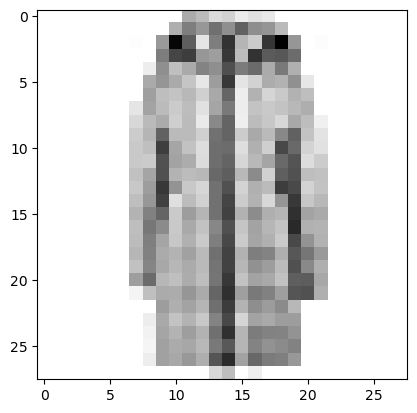

LABEL: 4
INPUT:


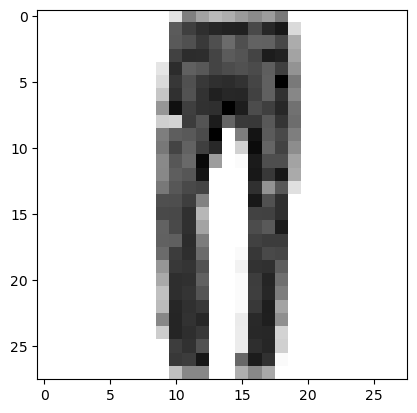

LABEL: 1
INPUT:


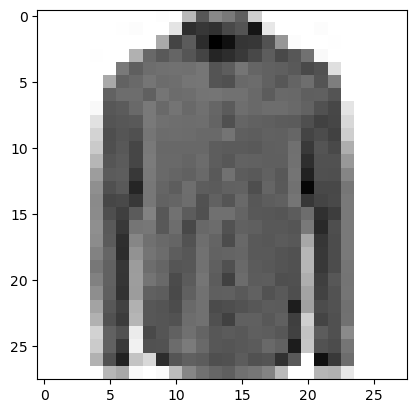

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#ADD CODE

mlp_cv = GridSearchCV(estimator=MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), param_grid=hl_parameters)

#END ADD CODE

mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.43655026
Iteration 2, loss = 2.22385965
Iteration 3, loss = 2.06169417
Iteration 4, loss = 1.83979512
Iteration 5, loss = 1.66713379
Iteration 6, loss = 1.51739342
Iteration 7, loss = 1.27935013
Iteration 8, loss = 1.07842344
Iteration 9, loss = 0.96152681
Iteration 10, loss = 0.98043193
Iteration 11, loss = 1.06216410
Iteration 12, loss = 1.10561611
Iteration 13, loss = 0.82225972
Iteration 14, loss = 0.71255602
Iteration 15, loss = 0.70055243
Iteration 16, loss = 0.64660242
Iteration 17, loss = 0.60263184
Iteration 18, loss = 0.56761807
Iteration 19, loss = 0.54029804
Iteration 20, loss = 0.54974163
Iteration 21, loss = 0.76697459
Iteration 22, loss = 0.55964159
Iteration 23, loss = 0.46741433
Iteration 24, loss = 0.43750225
Iteration 25, loss = 0.48080778
Iteration 26, loss = 0.48546306
Iteration 27, loss = 0.59695949
Iteration 28, loss = 0.38142245
Iteration 29, loss = 0.35327252
Iteration 30, loss = 0.44338010
Iteration 31, loss = 0.64467252
Iteration 32, los

Iteration 60, loss = 0.11942075
Iteration 61, loss = 0.11976516
Iteration 62, loss = 0.11489919
Iteration 63, loss = 0.11318057
Iteration 64, loss = 0.09720219
Iteration 65, loss = 0.09360786
Iteration 66, loss = 0.08915177
Iteration 67, loss = 0.14078779
Iteration 68, loss = 0.19153414
Iteration 69, loss = 0.13571643
Iteration 70, loss = 0.09953526
Iteration 71, loss = 0.08327751
Iteration 72, loss = 0.07653011
Iteration 73, loss = 0.08591035
Iteration 74, loss = 0.07128117
Iteration 75, loss = 0.06787987
Iteration 76, loss = 0.06427039
Iteration 77, loss = 0.06028247
Iteration 78, loss = 0.05811738
Iteration 79, loss = 0.05214500
Iteration 80, loss = 0.04987302
Iteration 81, loss = 0.04843157
Iteration 82, loss = 0.04585121
Iteration 83, loss = 0.04654415
Iteration 84, loss = 0.04560091
Iteration 85, loss = 0.04119869
Iteration 86, loss = 0.03980655
Iteration 87, loss = 0.04595146
Iteration 88, loss = 0.05912855
Iteration 89, loss = 0.03846235
Iteration 90, loss = 0.03576255
Iteratio

Iteration 144, loss = 0.01621521
Iteration 145, loss = 0.01603452
Iteration 146, loss = 0.01585037
Iteration 147, loss = 0.01560190
Iteration 148, loss = 0.01511513
Iteration 149, loss = 0.01500353
Iteration 150, loss = 0.01470299
Iteration 151, loss = 0.01452290
Iteration 152, loss = 0.01450662
Iteration 153, loss = 0.01418957
Iteration 154, loss = 0.01417100
Iteration 155, loss = 0.01381987
Iteration 156, loss = 0.01398015
Iteration 157, loss = 0.01350482
Iteration 158, loss = 0.01341870
Iteration 159, loss = 0.01309607
Iteration 160, loss = 0.01292952
Iteration 161, loss = 0.01282655
Iteration 162, loss = 0.01275982
Iteration 163, loss = 0.01270401
Iteration 164, loss = 0.01245390
Iteration 165, loss = 0.01235154
Iteration 166, loss = 0.01245148
Iteration 167, loss = 0.01210413
Iteration 168, loss = 0.01221394
Iteration 169, loss = 0.01164680
Iteration 170, loss = 0.01157557
Iteration 171, loss = 0.01136128
Iteration 172, loss = 0.01127849
Iteration 173, loss = 0.01109899
Iteration 

Iteration 181, loss = 0.00831132
Iteration 182, loss = 0.00831227
Iteration 183, loss = 0.00817486
Iteration 184, loss = 0.00807714
Iteration 185, loss = 0.00798858
Iteration 186, loss = 0.00790942
Iteration 187, loss = 0.00783758
Iteration 188, loss = 0.00787449
Iteration 189, loss = 0.00770817
Iteration 190, loss = 0.00769704
Iteration 191, loss = 0.00762054
Iteration 192, loss = 0.00750415
Iteration 193, loss = 0.00748439
Iteration 194, loss = 0.00740709
Iteration 195, loss = 0.00730218
Iteration 196, loss = 0.00728499
Iteration 197, loss = 0.00719069
Iteration 198, loss = 0.00711596
Iteration 199, loss = 0.00703604
Iteration 200, loss = 0.00698237
Iteration 201, loss = 0.00693344
Iteration 202, loss = 0.00689327
Iteration 203, loss = 0.00683326
Iteration 204, loss = 0.00674183
Iteration 205, loss = 0.00677517
Iteration 206, loss = 0.00666513
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40551630
Iteration 2, loss = 2

Iteration 19, loss = 0.49602531
Iteration 20, loss = 0.46613163
Iteration 21, loss = 0.45089417
Iteration 22, loss = 0.40219725
Iteration 23, loss = 0.37872279
Iteration 24, loss = 0.32526663
Iteration 25, loss = 0.32215176
Iteration 26, loss = 0.30495517
Iteration 27, loss = 0.31485852
Iteration 28, loss = 0.47593766
Iteration 29, loss = 0.38579629
Iteration 30, loss = 0.29048639
Iteration 31, loss = 0.23275677
Iteration 32, loss = 0.22643657
Iteration 33, loss = 0.20884335
Iteration 34, loss = 0.18749140
Iteration 35, loss = 0.17952555
Iteration 36, loss = 0.17279501
Iteration 37, loss = 0.16699340
Iteration 38, loss = 0.22012365
Iteration 39, loss = 0.31283944
Iteration 40, loss = 0.17109289
Iteration 41, loss = 0.14732975
Iteration 42, loss = 0.16014182
Iteration 43, loss = 0.13447315
Iteration 44, loss = 0.11627916
Iteration 45, loss = 0.10599167
Iteration 46, loss = 0.11026195
Iteration 47, loss = 0.11078930
Iteration 48, loss = 0.09387211
Iteration 49, loss = 0.07988811
Iteratio

Iteration 121, loss = 0.00828080
Iteration 122, loss = 0.00817469
Iteration 123, loss = 0.00811715
Iteration 124, loss = 0.00790783
Iteration 125, loss = 0.00780351
Iteration 126, loss = 0.00769588
Iteration 127, loss = 0.00773293
Iteration 128, loss = 0.00757441
Iteration 129, loss = 0.00740647
Iteration 130, loss = 0.00731431
Iteration 131, loss = 0.00718133
Iteration 132, loss = 0.00709734
Iteration 133, loss = 0.00704605
Iteration 134, loss = 0.00698400
Iteration 135, loss = 0.00684116
Iteration 136, loss = 0.00676157
Iteration 137, loss = 0.00671062
Iteration 138, loss = 0.00660366
Iteration 139, loss = 0.00662078
Iteration 140, loss = 0.00645757
Iteration 141, loss = 0.00639211
Iteration 142, loss = 0.00635073
Iteration 143, loss = 0.00629081
Iteration 144, loss = 0.00616752
Iteration 145, loss = 0.00608647
Iteration 146, loss = 0.00603207
Iteration 147, loss = 0.00594710
Iteration 148, loss = 0.00592590
Iteration 149, loss = 0.00585786
Iteration 150, loss = 0.00577854
Iteration 

Iteration 75, loss = 0.01924928
Iteration 76, loss = 0.01863910
Iteration 77, loss = 0.01815491
Iteration 78, loss = 0.01805345
Iteration 79, loss = 0.01716956
Iteration 80, loss = 0.01671572
Iteration 81, loss = 0.01628592
Iteration 82, loss = 0.01602366
Iteration 83, loss = 0.01534979
Iteration 84, loss = 0.01501139
Iteration 85, loss = 0.01459403
Iteration 86, loss = 0.01425206
Iteration 87, loss = 0.01388742
Iteration 88, loss = 0.01365038
Iteration 89, loss = 0.01331210
Iteration 90, loss = 0.01311408
Iteration 91, loss = 0.01277250
Iteration 92, loss = 0.01256582
Iteration 93, loss = 0.01228324
Iteration 94, loss = 0.01200998
Iteration 95, loss = 0.01168309
Iteration 96, loss = 0.01152464
Iteration 97, loss = 0.01128185
Iteration 98, loss = 0.01103174
Iteration 99, loss = 0.01082784
Iteration 100, loss = 0.01079307
Iteration 101, loss = 0.01043530
Iteration 102, loss = 0.01021027
Iteration 103, loss = 0.01005995
Iteration 104, loss = 0.00988448
Iteration 105, loss = 0.00970398
It

Iteration 45, loss = 0.45516603
Iteration 46, loss = 0.41186724
Iteration 47, loss = 0.39955524
Iteration 48, loss = 0.38404165
Iteration 49, loss = 0.37752628
Iteration 50, loss = 0.36070887
Iteration 51, loss = 0.34362153
Iteration 52, loss = 0.32132511
Iteration 53, loss = 0.33357943
Iteration 54, loss = 0.37545887
Iteration 55, loss = 0.29442686
Iteration 56, loss = 0.31596833
Iteration 57, loss = 0.42704150
Iteration 58, loss = 0.78037955
Iteration 59, loss = 7.56316871
Iteration 60, loss = 19.01789011
Iteration 61, loss = 10.47372542
Iteration 62, loss = 3.39245082
Iteration 63, loss = 2.68116461
Iteration 64, loss = 2.50147299
Iteration 65, loss = 2.46831592
Iteration 66, loss = 2.44133920
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41347892
Iteration 2, loss = 2.22470624
Iteration 3, loss = 2.07815573
Iteration 4, loss = 1.90134985
Iteration 5, loss = 1.75882458
Iteration 6, loss = 1.97865296
Iteration 7, loss 

Iteration 46, loss = 0.10172003
Iteration 47, loss = 0.09612261
Iteration 48, loss = 0.09834383
Iteration 49, loss = 0.07744411
Iteration 50, loss = 0.06238557
Iteration 51, loss = 0.05053442
Iteration 52, loss = 0.04859798
Iteration 53, loss = 0.04527096
Iteration 54, loss = 0.03613567
Iteration 55, loss = 0.03509022
Iteration 56, loss = 0.03007561
Iteration 57, loss = 0.02585814
Iteration 58, loss = 0.02523863
Iteration 59, loss = 0.02167983
Iteration 60, loss = 0.01980303
Iteration 61, loss = 0.01720456
Iteration 62, loss = 0.01679147
Iteration 63, loss = 0.01558818
Iteration 64, loss = 0.01410185
Iteration 65, loss = 0.01233659
Iteration 66, loss = 0.01158425
Iteration 67, loss = 0.01086312
Iteration 68, loss = 0.00983065
Iteration 69, loss = 0.00919494
Iteration 70, loss = 0.00863627
Iteration 71, loss = 0.00832915
Iteration 72, loss = 0.00767881
Iteration 73, loss = 0.00730071
Iteration 74, loss = 0.00720413
Iteration 75, loss = 0.00654351
Iteration 76, loss = 0.00624228
Iteratio

Iteration 48, loss = 0.10071693
Iteration 49, loss = 0.09037259
Iteration 50, loss = 0.08133277
Iteration 51, loss = 0.12410320
Iteration 52, loss = 0.34648296
Iteration 53, loss = 0.17122498
Iteration 54, loss = 0.09730282
Iteration 55, loss = 0.07411714
Iteration 56, loss = 0.06986796
Iteration 57, loss = 0.08772538
Iteration 58, loss = 0.04834521
Iteration 59, loss = 0.16363423
Iteration 60, loss = 0.61629496
Iteration 61, loss = 0.71367365
Iteration 62, loss = 4.50058868
Iteration 63, loss = 2.31391293
Iteration 64, loss = 2.12364904
Iteration 65, loss = 1.06779022
Iteration 66, loss = 0.88797631
Iteration 67, loss = 0.68645711
Iteration 68, loss = 0.58292442
Iteration 69, loss = 0.53906797
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31703910
Iteration 2, loss = 1.92634103
Iteration 3, loss = 1.61590990
Iteration 4, loss = 1.76760739
Iteration 5, loss = 1.30377873
Iteration 6, loss = 1.07551844
Iteration 7, loss = 

GridSearchCV(estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2091429, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print("hidden_layer_sizes:", mlp_cv.best_estimator_.hidden_layer_sizes) #ADD YOUR CODE

print("Score with best parameters:")
print("Score:", mlp_cv.best_score_) #ADD YOUR CODE

print("\nAll scores on the grid:")
print("Scores:", mlp_cv.cv_results_['mean_test_score']) #ADD YOUR CODE

print("\nBest estimator:", mlp_cv.best_estimator_)

RESULTS FOR NN

Best parameters set found:
hidden_layer_sizes: (50,)
Score with best parameters:
Score: 0.76

All scores on the grid:
Scores: [0.708 0.76  0.168 0.738]

Best estimator: MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=300,
              random_state=2091429, solver='sgd', verbose=True)


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

**Answer**: The first hidden layer recive a large number of input from the input layer (784 integer values). A little number of nodes in the first hidden layer will not be able to manage efficiently this large number of information. At the same time an higher number of layer will require more training. In this case the better option using 500 elements for the training set is the NN with one layer and 50 neurons.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_ #ADD YOUR CODE

training_error = 1. - mlp.score(X_train, y_train) #ADD YOUR CODE

test_error = 1. - mlp.score(X_test, y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.211345


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1033, 1000,  954,  993, 1009,  997, 1019, 1017,  973, 1005],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(estimator=MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), param_grid=hl_parameters) #ADD YOUR CODE

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.24341112
Iteration 2, loss = 0.63184017
Iteration 3, loss = 0.56167720
Iteration 4, loss = 0.50886379
Iteration 5, loss = 0.48794665
Iteration 6, loss = 0.45586463
Iteration 7, loss = 0.42971565
Iteration 8, loss = 0.43710492
Iteration 9, loss = 0.42017452
Iteration 10, loss = 0.40616644
Iteration 11, loss = 0.40190216
Iteration 12, loss = 0.39776259
Iteration 13, loss = 0.37496280
Iteration 14, loss = 0.37316872
Iteration 15, loss = 0.37651385
Iteration 16, loss = 0.36955450
Iteration 17, loss = 0.34947923
Iteration 18, loss = 0.36095806
Iteration 19, loss = 0.34424945
Iteration 20, loss = 0.33836329
Iteration 21, loss = 0.33765966
Iteration 22, loss = 0.32914794
Iteration 23, loss = 0.33461468
Iteration 24, loss = 0.31852249
Iteration 25, loss = 0.32552561
Iteration 26, loss = 0.32501808
Iteration 27, loss = 0.31747105
Iteration 28, loss = 0.30424464
Iteration 29, loss = 0.30267974
Iteration 30, loss = 0.29322804
Iteration 31, loss = 0.30162084
Iteration 32, los

Iteration 153, loss = 0.10831292
Iteration 154, loss = 0.13872419
Iteration 155, loss = 0.12096896
Iteration 156, loss = 0.13185126
Iteration 157, loss = 0.10410576
Iteration 158, loss = 0.11955984
Iteration 159, loss = 0.17207764
Iteration 160, loss = 0.14489057
Iteration 161, loss = 0.11882518
Iteration 162, loss = 0.11467971
Iteration 163, loss = 0.10764467
Iteration 164, loss = 0.10878140
Iteration 165, loss = 0.11613478
Iteration 166, loss = 0.10553273
Iteration 167, loss = 0.10310182
Iteration 168, loss = 0.10407993
Iteration 169, loss = 0.11000233
Iteration 170, loss = 0.12201564
Iteration 171, loss = 0.10624236
Iteration 172, loss = 0.12612936
Iteration 173, loss = 0.10001227
Iteration 174, loss = 0.09872624
Iteration 175, loss = 0.10757618
Iteration 176, loss = 0.09844959
Iteration 177, loss = 0.15074920
Iteration 178, loss = 0.12065635
Iteration 179, loss = 0.09527548
Iteration 180, loss = 0.09956371
Iteration 181, loss = 0.09835690
Iteration 182, loss = 0.09821309
Iteration 

Iteration 33, loss = 0.30493191
Iteration 34, loss = 0.29077590
Iteration 35, loss = 0.29180147
Iteration 36, loss = 0.29653467
Iteration 37, loss = 0.28385906
Iteration 38, loss = 0.28878815
Iteration 39, loss = 0.28633460
Iteration 40, loss = 0.28980383
Iteration 41, loss = 0.27489901
Iteration 42, loss = 0.27238404
Iteration 43, loss = 0.27550180
Iteration 44, loss = 0.27620710
Iteration 45, loss = 0.27368490
Iteration 46, loss = 0.28195490
Iteration 47, loss = 0.27367503
Iteration 48, loss = 0.26458571
Iteration 49, loss = 0.26496486
Iteration 50, loss = 0.27143117
Iteration 51, loss = 0.26686194
Iteration 52, loss = 0.26593353
Iteration 53, loss = 0.27121985
Iteration 54, loss = 0.25382396
Iteration 55, loss = 0.25026366
Iteration 56, loss = 0.26014691
Iteration 57, loss = 0.24961131
Iteration 58, loss = 0.26801603
Iteration 59, loss = 0.24592365
Iteration 60, loss = 0.25114890
Iteration 61, loss = 0.26907621
Iteration 62, loss = 0.24785305
Iteration 63, loss = 0.24789237
Iteratio

Iteration 47, loss = 0.11439105
Iteration 48, loss = 0.10869581
Iteration 49, loss = 0.10074646
Iteration 50, loss = 0.09398110
Iteration 51, loss = 0.08818788
Iteration 52, loss = 0.09110943
Iteration 53, loss = 0.07386419
Iteration 54, loss = 0.08762468
Iteration 55, loss = 0.10186451
Iteration 56, loss = 0.06735620
Iteration 57, loss = 0.08202808
Iteration 58, loss = 0.09296342
Iteration 59, loss = 0.07654954
Iteration 60, loss = 0.07748342
Iteration 61, loss = 0.07731109
Iteration 62, loss = 0.06322405
Iteration 63, loss = 0.06447957
Iteration 64, loss = 0.05407090
Iteration 65, loss = 0.05876228
Iteration 66, loss = 0.06744766
Iteration 67, loss = 0.05678907
Iteration 68, loss = 0.05906891
Iteration 69, loss = 0.05637606
Iteration 70, loss = 0.05310885
Iteration 71, loss = 0.04569805
Iteration 72, loss = 0.04567863
Iteration 73, loss = 0.04351736
Iteration 74, loss = 0.04604906
Iteration 75, loss = 0.07517281
Iteration 76, loss = 0.04836138
Iteration 77, loss = 0.04478335
Iteratio

Iteration 48, loss = 0.09396811
Iteration 49, loss = 0.09200283
Iteration 50, loss = 0.09805422
Iteration 51, loss = 0.07659215
Iteration 52, loss = 0.09732587
Iteration 53, loss = 0.08789514
Iteration 54, loss = 0.08243216
Iteration 55, loss = 0.08660537
Iteration 56, loss = 0.07234666
Iteration 57, loss = 0.07734829
Iteration 58, loss = 0.07347512
Iteration 59, loss = 0.06982553
Iteration 60, loss = 0.09559931
Iteration 61, loss = 0.07476947
Iteration 62, loss = 0.06488695
Iteration 63, loss = 0.05778840
Iteration 64, loss = 0.05681633
Iteration 65, loss = 0.08690338
Iteration 66, loss = 0.05724329
Iteration 67, loss = 0.04764521
Iteration 68, loss = 0.05304258
Iteration 69, loss = 0.11866120
Iteration 70, loss = 0.07575490
Iteration 71, loss = 0.06224833
Iteration 72, loss = 0.04421951
Iteration 73, loss = 0.03993153
Iteration 74, loss = 0.03720621
Iteration 75, loss = 0.03326257
Iteration 76, loss = 0.04528110
Iteration 77, loss = 0.04882753
Iteration 78, loss = 0.03361351
Iteratio

Iteration 76, loss = 0.04300606
Iteration 77, loss = 0.04295729
Iteration 78, loss = 0.05634938
Iteration 79, loss = 0.05278851
Iteration 80, loss = 0.03968200
Iteration 81, loss = 0.03538167
Iteration 82, loss = 0.03910641
Iteration 83, loss = 0.02818591
Iteration 84, loss = 0.02813271
Iteration 85, loss = 0.04202738
Iteration 86, loss = 0.07332415
Iteration 87, loss = 0.03385101
Iteration 88, loss = 0.03102161
Iteration 89, loss = 0.05958289
Iteration 90, loss = 0.03077677
Iteration 91, loss = 0.02745393
Iteration 92, loss = 0.02535903
Iteration 93, loss = 0.02259174
Iteration 94, loss = 0.02791287
Iteration 95, loss = 0.02466861
Iteration 96, loss = 0.01931097
Iteration 97, loss = 0.02177118
Iteration 98, loss = 0.02323493
Iteration 99, loss = 0.02149170
Iteration 100, loss = 0.01722198
Iteration 101, loss = 0.01919865
Iteration 102, loss = 0.01726940
Iteration 103, loss = 0.04937925
Iteration 104, loss = 0.02448468
Iteration 105, loss = 0.02946462
Iteration 106, loss = 0.01703651
I

Iteration 96, loss = 0.20787760
Iteration 97, loss = 0.20946909
Iteration 98, loss = 0.22271150
Iteration 99, loss = 0.24606954
Iteration 100, loss = 0.21924973
Iteration 101, loss = 0.21569191
Iteration 102, loss = 0.23851228
Iteration 103, loss = 0.22090674
Iteration 104, loss = 0.19932925
Iteration 105, loss = 0.21511246
Iteration 106, loss = 0.20479150
Iteration 107, loss = 0.19437804
Iteration 108, loss = 0.20329022
Iteration 109, loss = 0.21079446
Iteration 110, loss = 0.20886005
Iteration 111, loss = 0.20089003
Iteration 112, loss = 0.19109086
Iteration 113, loss = 0.19623914
Iteration 114, loss = 0.20468462
Iteration 115, loss = 0.20187860
Iteration 116, loss = 0.18917233
Iteration 117, loss = 0.18454872
Iteration 118, loss = 0.21521219
Iteration 119, loss = 0.18946733
Iteration 120, loss = 0.20808412
Iteration 121, loss = 0.19467089
Iteration 122, loss = 0.18934836
Iteration 123, loss = 0.20556332
Iteration 124, loss = 0.35683366
Iteration 125, loss = 0.34294396
Iteration 126,

Iteration 1, loss = 1.39573226
Iteration 2, loss = 0.71514851
Iteration 3, loss = 0.61858943
Iteration 4, loss = 0.56592036
Iteration 5, loss = 0.53363495
Iteration 6, loss = 0.52066935
Iteration 7, loss = 0.49030595
Iteration 8, loss = 0.48102681
Iteration 9, loss = 0.44868534
Iteration 10, loss = 0.46017849
Iteration 11, loss = 0.44230695
Iteration 12, loss = 0.42717251
Iteration 13, loss = 0.41794393
Iteration 14, loss = 0.41943361
Iteration 15, loss = 0.40228140
Iteration 16, loss = 0.41638806
Iteration 17, loss = 0.39505418
Iteration 18, loss = 0.38390562
Iteration 19, loss = 0.38026698
Iteration 20, loss = 0.38410926
Iteration 21, loss = 0.38438053
Iteration 22, loss = 0.37667976
Iteration 23, loss = 0.36268730
Iteration 24, loss = 0.38501505
Iteration 25, loss = 0.37319330
Iteration 26, loss = 0.35063565
Iteration 27, loss = 0.36530315
Iteration 28, loss = 0.35757738
Iteration 29, loss = 0.34018144
Iteration 30, loss = 0.34136727
Iteration 31, loss = 0.35026411
Iteration 32, los

Iteration 32, loss = 0.13575789
Iteration 33, loss = 0.15024135
Iteration 34, loss = 0.15208137
Iteration 35, loss = 0.13792167
Iteration 36, loss = 0.13144795
Iteration 37, loss = 0.13772470
Iteration 38, loss = 0.12349420
Iteration 39, loss = 0.11751778
Iteration 40, loss = 0.11951089
Iteration 41, loss = 0.12484150
Iteration 42, loss = 0.12150945
Iteration 43, loss = 0.10719399
Iteration 44, loss = 0.10725764
Iteration 45, loss = 0.09450418
Iteration 46, loss = 0.08798131
Iteration 47, loss = 0.08399765
Iteration 48, loss = 0.09380074
Iteration 49, loss = 0.13732184
Iteration 50, loss = 0.11612088
Iteration 51, loss = 0.11261748
Iteration 52, loss = 0.11457850
Iteration 53, loss = 0.10364289
Iteration 54, loss = 0.10657210
Iteration 55, loss = 0.10382538
Iteration 56, loss = 0.08995464
Iteration 57, loss = 0.09545179
Iteration 58, loss = 0.07653488
Iteration 59, loss = 0.08462012
Iteration 60, loss = 0.07052355
Iteration 61, loss = 0.06754719
Iteration 62, loss = 0.08196600
Iteratio

Iteration 25, loss = 0.18765373
Iteration 26, loss = 0.18835459
Iteration 27, loss = 0.18378713
Iteration 28, loss = 0.17014333
Iteration 29, loss = 0.17190066
Iteration 30, loss = 0.17159521
Iteration 31, loss = 0.15409803
Iteration 32, loss = 0.16012796
Iteration 33, loss = 0.16285369
Iteration 34, loss = 0.14383160
Iteration 35, loss = 0.16844279
Iteration 36, loss = 0.19222087
Iteration 37, loss = 0.16033698
Iteration 38, loss = 0.13238072
Iteration 39, loss = 0.12970329
Iteration 40, loss = 0.12167611
Iteration 41, loss = 0.12209704
Iteration 42, loss = 0.11497033
Iteration 43, loss = 0.12701317
Iteration 44, loss = 0.11178665
Iteration 45, loss = 0.09939098
Iteration 46, loss = 0.14458564
Iteration 47, loss = 0.11787292
Iteration 48, loss = 0.12532424
Iteration 49, loss = 0.10082744
Iteration 50, loss = 0.10600640
Iteration 51, loss = 0.12366970
Iteration 52, loss = 0.09718686
Iteration 53, loss = 0.09468767
Iteration 54, loss = 0.09593641
Iteration 55, loss = 0.08257588
Iteratio

Iteration 84, loss = 0.05001475
Iteration 85, loss = 0.06093605
Iteration 86, loss = 0.04256053
Iteration 87, loss = 0.05286196
Iteration 88, loss = 0.05003996
Iteration 89, loss = 0.05262746
Iteration 90, loss = 0.04891973
Iteration 91, loss = 0.04634382
Iteration 92, loss = 0.05927167
Iteration 93, loss = 0.06205749
Iteration 94, loss = 0.06332456
Iteration 95, loss = 0.05352037
Iteration 96, loss = 0.05165313
Iteration 97, loss = 0.08838423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


GridSearchCV(estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2091429, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print("hidden_layer_sizes:", mlp_large_cv.best_estimator_.hidden_layer_sizes) #ADD YOUR CODE

print("Score with best parameters:")
print("Score:", mlp_large_cv.best_score_) #ADD YOUR CODE

print("\nAll scores on the grid:")
print("Scores:", mlp_large_cv.cv_results_['mean_test_score']) #ADD YOUR CODE

RESULTS FOR NN

Best parameters set found:
hidden_layer_sizes: (50, 50)
Score with best parameters:
Score: 0.8529

All scores on the grid:
Scores: [0.7972 0.844  0.8071 0.8529]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**Answer**: The results obtained using a bigger training set are better than the previous one. Is interesting to notice that the NN with hidden_layer_sizes: (50, 50) become the best NN, thanks to the higher number of elements in the training set. In this case the better option using 10000 elements for the training set is the NN with two layer and 50 neurons in each layer.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_ #ADD YOUR CODE

training_error = 1. - mlp.score(X_train, y_train) #ADD YOUR CODE

test_error = 1. - mlp.score(X_test, y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.210200
Best NN test error: 0.209460


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**Answer**: Despite the two NN have different hidden layer number and a different structure, the results are similar. Using the bigger NN with a lot of more data do not give an important upgrade in the performance.  

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Index: 9
Predict of lr:  3
predict of SVM:  2
INPUT:


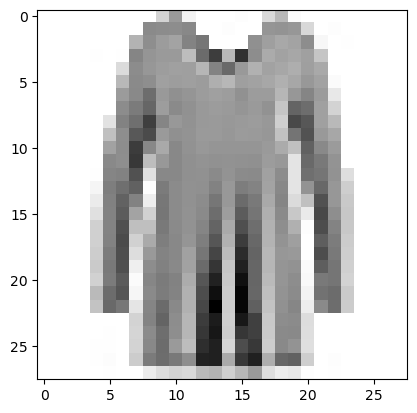

LABEL: 2


In [15]:
#ADD YOUR CODE

mlp_predict = mlp.predict(X_test)
mlp_large_predict = best_mlp_large.predict(X_test)

for i in range(mlp_predict.size):
    if mlp_predict[i] != mlp_large_predict[i] and mlp_large_predict[i] == y_test[i]:
        break
        
print("Index:", i)
print("Predict of lr: ", mlp_predict[i])
print("predict of SVM: ", mlp_large_predict[i])

plot_input(X_test,y_test,i)

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


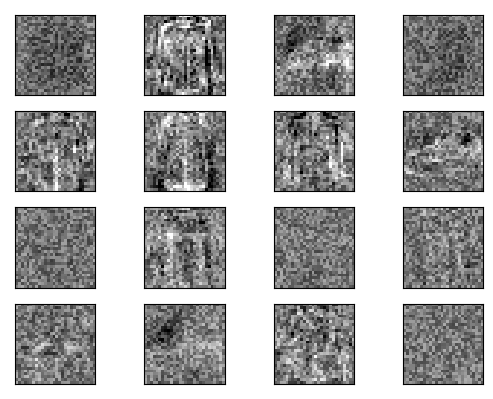

Weights with 10000 data points:


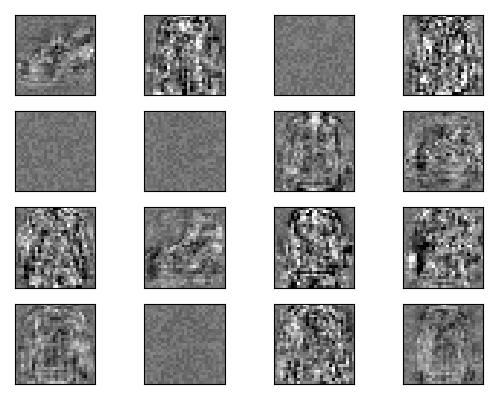

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

**Answer**: Looking at the pictures is possible to see how they look like some of our inputs. This is because every neuron have the role of filtering in the better possible way the image in input using specific values for the weights, giving an higher value at some specific elements and a lower one at others.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

**Answer**: I choose to use a SVC classifier, choosing among different kernels, Cs and gammas.

In [17]:
# ADD YOUR CODE
from sklearn.svm import SVC

parameters = {'kernel':['rbf', 'poly', 'sigmoid'],'C':[1, 10, 100],'gamma':[0.01,0.1,1.]}

svm_other = GridSearchCV(estimator=SVC(), param_grid=parameters)

svm_other.fit(X_train, y_train)

print("Best parameters set found:")
print("kernel:", svm_other.best_estimator_.kernel, "C:", svm_other.best_estimator_.C, ",gamma:", svm_other.best_estimator_.gamma)

print("Score with best parameters:")
print("Score:", svm_other.best_score_)

print("\nAll scores on the grid:")
print("Scores:", svm_other.cv_results_['mean_test_score'])

other = svm_other.best_estimator_

# END ADD CODE

training_error_other = 1. - other.score(X_train, y_train) #ADD YOUR CODE

test_error_other = 1. - other.score(X_test, y_test) #ADD YOUR CODE

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

Best parameters set found:
kernel: rbf C: 10 ,gamma: 0.01
Score with best parameters:
Score: 0.8771000000000001

All scores on the grid:
Scores: [0.8596 0.8161 0.4251 0.7994 0.8363 0.0633 0.1202 0.8365 0.1033 0.8771
 0.8401 0.4153 0.8088 0.8365 0.1686 0.1306 0.8365 0.1035 0.8691 0.837
 0.4033 0.8088 0.8365 0.1708 0.1306 0.8365 0.0701]
RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.016200
Best test error (other model): 0.122220


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

**Answer**: The better solution is provided by the SVC(kernel='rbf', C=10, gamma=0.01), with a training error of 0.016 and a test error of 0.12. The SVC perform better in this case, but require a lot of time for the training while probably the solution with (50, 50) nodes is not the best berforming structure for this MLP.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [18]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [19]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [20]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train) #COMPLETE
# ADD CODE

y_pred = kmeans.predict(X_train)

# END ADD CODE

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [21]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
#ADD CODE
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(y_train, y_pred)

array([[ 98,   0,   8,   1,   0,  63,   0,  25,   6,  23],
       [  0,   0,   0, 184,   0,   4,   0,  13,   0,   9],
       [  2,   0, 122,   1,   0,  67,   1,   5,   1,  10],
       [  1,   0,   3,  78,   0,  19,   0,  75,   0,  21],
       [  0,   0, 107,   4,   0,  31,   0,  39,   0,   6],
       [  0,  69,   0,   0,  15,   1,   1,   1,   1, 117],
       [ 22,   0,  60,   0,   0,  44,   0,  13,   1,  32],
       [  0, 182,   0,   0,   7,   0,   0,   0,   0,  18],
       [  0,   7,  11,   0,   0,   8,  74,   5,  79,  14],
       [  0,  34,   0,   0, 149,   1,   0,   1,   0,   6]], dtype=int64)

## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

**Answer**: In the matrix above the condition that represents the correctess of the prediction is the higher possible value in every slot of the diagonal. In this case the values are not good, the greater part of the elements are not placed in the diagonal, so the prediction differ from the true label in a lot of cases

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [22]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

from sklearn.metrics import silhouette_score

list_of_silhouttes = []
for i in range(2,16):
    
    kmeans_pred = KMeans(n_clusters=i, n_init=10, random_state=ID).fit_predict(X_train) #ADD CODE
    
    silhouttescore = silhouette_score(X_train, kmeans_pred) #COMPLETE
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19272907229383923
Silhoutte coefficient for number of clusters=3: 0.18670697216065563
Silhoutte coefficient for number of clusters=4: 0.1817660235934292
Silhoutte coefficient for number of clusters=5: 0.16613801576470513
Silhoutte coefficient for number of clusters=6: 0.15911502317807402
Silhoutte coefficient for number of clusters=7: 0.16908545331544156
Silhoutte coefficient for number of clusters=8: 0.15912518605273357
Silhoutte coefficient for number of clusters=9: 0.16238140979662846
Silhoutte coefficient for number of clusters=10: 0.15760169656213355
Silhoutte coefficient for number of clusters=11: 0.14523101403169902
Silhoutte coefficient for number of clusters=12: 0.14178778139712506
Silhoutte coefficient for number of clusters=13: 0.13574493963824358
Silhoutte coefficient for number of clusters=14: 0.13290738495170018
Silhoutte coefficient for number of clusters=15: 0.13182423144750088


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

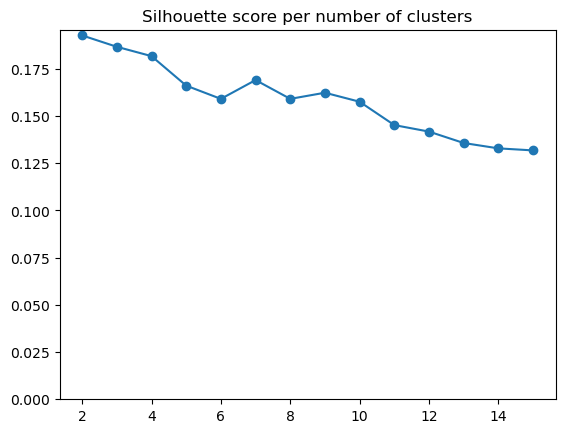

In [23]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

**Answer**: Theoretically the best number of clusters is the one with the higher Silhouette score, so in this case is 2. This is not a good parameter knowing the data structure because we have a total of ten different labels, but every image will be classified with only two different labels. This means that the best parameter to pick is 10, therefore the best cluster number with at least ten cluster. In any case, the results are not good (near at zero), so the best thing to do in this case is try to remake the clustering with different parameters.